<a href="https://colab.research.google.com/github/giakhangle/phantichdulieu/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape (60000, 28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                440       
                                                                 
 activation_4 (Activation)   (None, 40)                0         
                                          

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


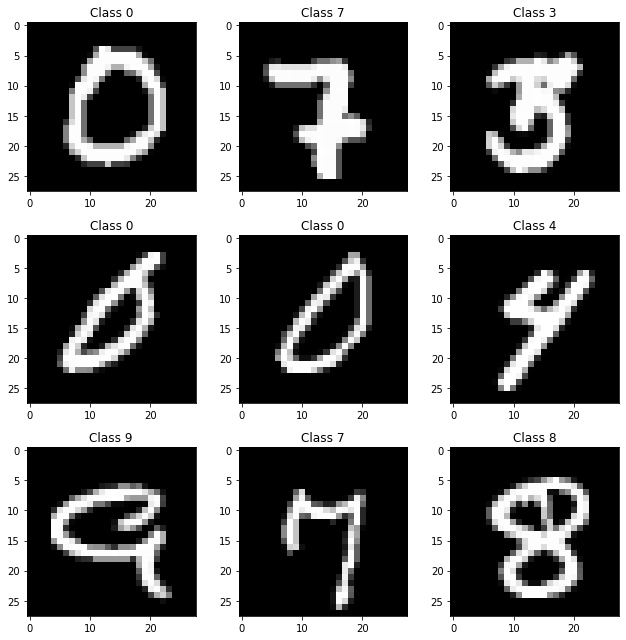

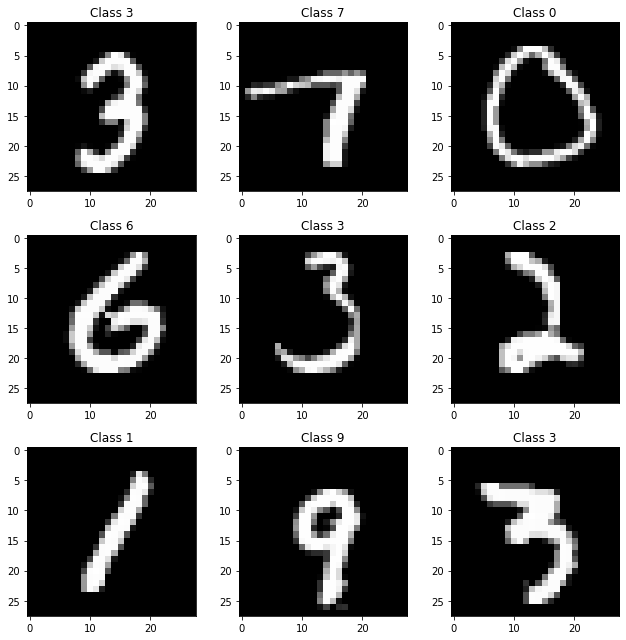

In [2]:
import numpy as np
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# để chọn ngẫu nhiên các tấm ảnh
import random
import os
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
from keras.models import load_model
from matplotlib import image
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation
(x_train,y_train),(x_test,y_test)=mnist.load_data()

def load_image(filename):
  # load tấm ảnh lên
  img = load_img(filename, grayscale=True, target_size=(28, 28))
  # chuyển về dạng vector
  img=img_to_array(img)
	# reshape into a single sample with 1 channel
  img=img.reshape(1,784)
  img=img.astype('float32')
  #chuẩn hóa dữ liệu về 0-1
  img=img/255.0
  return img

# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-255, 0 là màu đen và 255 là màu trắng sáng nhất
# các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28

print("x_train shape",x_train.shape)

# nếu muốn hiển thị ngẫu nhiên các tấm ảnh trong tập train thì dùng hàm sau

plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()  

# thay đổi kích thước đầu vào chuyển đầu vào của mỗi tấm ảnh về dạng vector, 
# vì tập dữ liệu mnist được lưu ở dạng 
# ma trận 2 chiều gồm 28 dòng và 28 cột
# trước khi truyền vào mạng neural cần chuyển sang dạng vector. Nếu dùng mạng CNN thì ko cần chuyển
# mạng CNN các sv tự tìm hiểu thêm
# 784= 28*28
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

# sau khi chuẩn hóa xong muốn xem lại tập train thì cùng hàm print
print(x_train)

# tương tự đối với tập train,tập test chỉ gồm 10000 tấm ảnh
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

# sau khi chuẩn hóa xong muốn xem lại tập test thì cùng hàm print
print(x_test)

# vì đầu ra của mạng neural là nhận dạng 1 tấm ảnh thuộc 1 trong các lớp 0-9, nên ta dùng hàm này để 
# gán các giá trị kết quả cho tập y_test
# ví dụ tấm ảnh là số 2 thì y_test ứng với tấm đó là:
# [[0. 0. 1. ... 0. 0. 0.]]
# giá trị ở vị trí số 2 là 1, các giá trị còn lại là 0
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
history=model.fit (x_train, y_train, batch_size = 128, epochs = 5,verbose = 2,validation_data = ( x_test, y_test ))
#model.fit(x_train,y_train,batch_size=128,epochs=5)
save_dir = "/ results /"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save (model_path)
print( 'Saved trained model at %s ' % model_path )

fig = plt.figure ()
plt.subplot( 2,1,1 )
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title ('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='lower right')

plt.subplot (2,1,2)
plt.plot( history.history ['loss'])
plt.plot( history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()


mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate( x_test, y_test, verbose = 2 )
print( "Test Loss" , loss_and_metrics [0])
print( "Test Accuracy" , loss_and_metrics[1])


#load 1 tấm ảnh cần dự báo
image_test = load_image('so2.JPG')

#dụ báo tấm ảnh này là số mấy
digit = mnist_model.predict(image_test)
print('Du bao day la so:',digit[0].argmax())

# hiển thị 9 tấm ảnh ngẫu nhiên trong tập test
# hiển thị kết quả dự báo của 9 tấm ảnh này theo mô hình neural vừa xây dựng
# vì hàm imshow để hiển thị tấm ảnh dạng 28*28, vì ta đã reshape tấm ảnh thành dạng vector ở bước trước
# nên bây giờ muốn hiển thị tấm ảnh cho tập dữ liệu đã reshape, ta lại dùng hàm reshape để về dạng ban đầu
# vì hàm softmax dùng ở mạng neural ở lớp output là hàm tính xác suất, nên xác suất rơi vào lớp nào nhiều nhất thì output sẽ ra giá trị đó.
# muốn xuất kết quả dự báo, ta dùng hàm argmax()
predicted_classes=mnist_model.predict(x_test)

plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()  